In [2]:
import pandas as pd
import numpy as np
import rioxarray as rxr
import xarray as xr
from pathlib import Path 
import time
import netCDF4

In [3]:
rn_dic = {
    'Cloud_Optical_Thickness_Liquid_Mean':'COT',
    'Cloud_Effective_Radius_Liquid_Mean': 'r_eff',
    'Cloud_Water_Path_Liquid_Mean': 'CWP',
}

In [4]:
produce_files = [
    'Cloud_Optical_Thickness_Liquid_Mean', 
    'Cloud_Effective_Radius_Liquid_Mean',
    'Cloud_Water_Path_Liquid_Mean',
    'Cloud_Water_Path_Liquid_Mean_Uncertainty',
    'Cloud_Water_Path_Liquid_Standard_Deviation',
    'Cloud_Water_Path_Liquid_Maximum',
    'Cloud_Water_Path_Liquid_Minimum',
]
producw_files_extra=[
    'Cloud_Top_Temperature_Day_Maximum',
    'Cloud_Top_Temperature_Day_Mean',
    'Cloud_Top_Temperature_Day_Minimum',
    'Cloud_Top_Pressure_Day_Mean',
    'Cloud_Top_Pressure_Day_Maximum',
    'Cloud_Top_Pressure_Day_Minimum',
    'Cloud_Top_Height_Day_Mean',
    'Cloud_Top_Height_Day_Maximum',
    'Cloud_Top_Height_Day_Minimum',
    'Cloud_Fraction_Day_Mean',
    'Cloud_Fraction_Day_Maximum',
    'Cloud_Fraction_Day_Minimum',
    'Cloud_Optical_Thickness_Liquid_Maximum',
    #'Cloud_Optical_Thickness_Liquid_Mean',
    'Cloud_Optical_Thickness_Liquid_Mean_Uncertainty',
    'Cloud_Optical_Thickness_Liquid_Minimum',
    'Cloud_Optical_Thickness_Liquid_Standard_Deviation',
    'Cloud_Optical_Thickness_Combined_Mean',
    'Cloud_Optical_Thickness_Combined_Maximum',
    'Cloud_Optical_Thickness_Combined_Minimum',
    'Cloud_Optical_Thickness_Combined_Standard_Deviation',
    'Cloud_Effective_Radius_Liquid_Mean_Uncertainty',
    #'Cloud_Effective_Radius_Liquid_Mean',
]

In [5]:
from bs_fdbck.constants import path_measurement_data

## Settings: 

In [6]:
# path_raw_data = path_measurement_data /'satellite' / 'MODIS_raw'

# path_out_netcdf = path_measurement_data /'satellite' / 'MODIS_netcdf'

path_out_postproc = path_measurement_data /'satellite' / 'MODIS_postproc'
path_out_postproc_lev2 = path_measurement_data /'satellite' / 'MODIS_postproc_lev2'

station = 'SMR'
outfilename = path_out_postproc_lev2 / f'MODIS_date_{station}.nc'


fl = list(path_out_postproc.glob('*.nc'))
fl.sort()

In [7]:
tau_lims = [5,50]
r_eff_lim = 5
cloud_top_temp_above = -15 
cld_water_path_above = 60
#include_months = [7,8]

from_year = '2012'
to_year = '2018'
daytime_from = 10
daytime_to = daytime_from + 7


## Set station specifics;

In [8]:
high_perc_OA = 3.02
low_perc_OA = 1.59

In [9]:
lat_lims = [60, 66]
lon_lims = [22,30]

In [10]:
for f in fl:
    print(f)
 

/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/satellite/MODIS_postproc/MYD08_D3_Cloud_Effective_Radius_Liquid_Mean_2012.nc
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/satellite/MODIS_postproc/MYD08_D3_Cloud_Effective_Radius_Liquid_Mean_2013.nc
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/satellite/MODIS_postproc/MYD08_D3_Cloud_Effective_Radius_Liquid_Mean_2014.nc
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/satellite/MODIS_postproc/MYD08_D3_Cloud_Effective_Radius_Liquid_Mean_2015.nc
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/satellite/MODIS_postproc/MYD08_D3_Cloud_Effective_Radius_Liquid_Mean_2016.nc
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/satellite/MODIS_postproc/MYD08_D3_Cloud_Effective_Radius_Liquid_Mean_2017.nc
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/satellite/MODIS_postproc/MYD08_D3_Cloud_Effective_Radius_Liquid_Mean_2018.nc
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/satellite/MODIS_postproc/MYD08_D3_Cloud_Optical_Thickness_Liq

## Set station specifics;

In [11]:
lat_lims = [60, 66]
lon_lims = [22,30]

In [12]:
tau_lims = [5,50]
r_eff_lim = 5
cloud_top_temp_above = -15 
cld_water_path_above = 60
include_months = [7,8]

## Extract relevant data:

In [13]:
ds_satellite = xr.open_mfdataset(fl).squeeze('band')

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
(click 8.0.1 (/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages), Requirement.parse('click<8,>=4.0'), {'rasterio'})
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


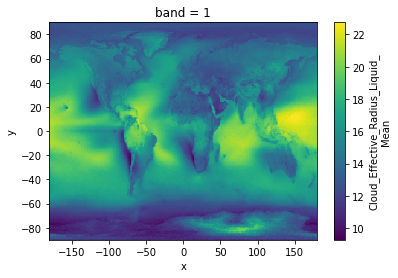

In [14]:
ds_satellite['Cloud_Effective_Radius_Liquid_Mean'].mean('time').plot()

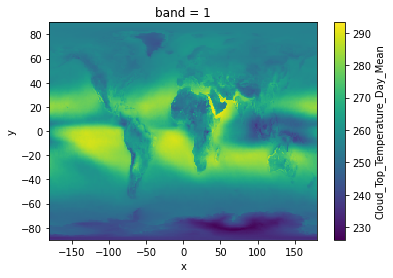

In [15]:
ds_satellite['Cloud_Top_Temperature_Day_Mean'].mean('time').plot()

In [16]:
ds_satellite['month'] = ds_satellite['time.month']
ds_satellite_sum = ds_satellite.where(ds_satellite['month'].isin([7,8]), drop=True)

In [17]:
df_sum = ds_satellite_sum[['Cloud_Effective_Radius_Liquid_Mean']].squeeze().sel(x = slice(*lon_lims), y = slice(*lat_lims[::-1])).to_dataframe()#'band')

In [18]:
df_sum = df_sum.dropna().reset_index()
df_sum.groupby([df_sum['y'],df_sum['x']]).count()

time  Cloud_Effective_Radius_Liquid_Mean  band
y    x                                                   
60.5 22.5   396                                 396   396
     23.5   401                                 401   401
     24.5   392                                 392   392
     25.5   394                                 394   394
     26.5   393                                 393   393
     27.5   384                                 384   384
     28.5   385                                 385   385
     29.5   401                                 401   401
61.5 22.5   399                                 399   399
     23.5   389                                 389   389
     24.5   387                                 387   387
     25.5   385                                 385   385
     26.5   381                                 381   381
     27.5   385                                 385   385
     28.5   389                                 389   389
     29.5   391                                 391   391
62.5 22.5   402                                 402   402
     23.5   387                                 387   387
     24.5   396                                 396   396
     25.5   392                                 392   392
     26.5   389                                 389   389
     27.5   383                                 383   383
     28.5   380                                 380   380
     29.5   387                                 387   387
63.5 22.5   381                                 381   381
     23.5   385                                 385   385
     24.5   390                                 390   390
     25.5   382                                 382   382
     26.5   383                                 383   383
     27.5   391                                 391   391
     28.5   390                                 390   390
     29.5   386                                 386   386
64.5 22.5   324                                 324   324
     23.5   348                                 348   348
     24.5   391                                 391   391
     25.5   398                                 398   398
     26.5   393                                 393   393
     27.5   390                                 390   390
     28.5   387                                 387   387
     29.5   380                                 380   380
65.5 22.5   363                                 363   363
     23.5   352                                 352   352
     24.5   374                                 374   374
     25.5   386                                 386   386
     26.5   394                                 394   394
     27.5   399                                 399   399
     28.5   385                                 385   385
     29.5   378                                 378   378

## Mask values by r_eff, tau, cloud top temperature and cloud water path: 

In [19]:
ds_satellite_mask = ds_satellite.where(ds_satellite['Cloud_Effective_Radius_Liquid_Mean']>=r_eff_lim)
ds_satellite_mask = ds_satellite_mask.where(ds_satellite_mask['Cloud_Optical_Thickness_Liquid_Mean']>tau_lims[0])
ds_satellite_mask = ds_satellite_mask.where(ds_satellite_mask['Cloud_Optical_Thickness_Liquid_Mean']<tau_lims[1])
ds_satellite_mask = ds_satellite_mask.where(ds_satellite_mask['Cloud_Top_Temperature_Day_Mean']>(cloud_top_temp_above+273.15))
ds_satellite_mask = ds_satellite_mask.where(ds_satellite_mask['Cloud_Water_Path_Liquid_Mean']>=cld_water_path_above)

## Mask values by 

In [20]:
ds_satellite_mask['month'] = ds_satellite_mask['time.month']
ds_satellite_mask_sum = ds_satellite_mask.where(ds_satellite_mask['month'].isin([7,8]), drop=True)
df_sum = ds_satellite_mask_sum[['Cloud_Effective_Radius_Liquid_Mean']].squeeze().sel(x = slice(*lon_lims), y = slice(*lat_lims[::-1])).to_dataframe()#'band')
df_sum = df_sum.dropna().reset_index()
df_sum_cnt = df_sum.groupby([df_sum['y'],df_sum['x']]).count()

In [21]:
ds_sat_hyy = ds_satellite_mask.squeeze().sel(x = slice(*lon_lims), y = slice(*lat_lims[::-1]))#.to_dataframe()#'band')


## Get OA data: 

In [22]:
import datetime

In [23]:
from bs_fdbck.constants import path_measurement_data
import pandas as pd

In [24]:
    
def timeround10(dt):
    a, b = divmod(round(dt.minute, -1), 60)
    tdelta = datetime.timedelta(hours = (dt.hour+a), minutes=b)
    nh = (dt.hour+a)%24
    ndt = datetime.datetime(dt.year,dt.month, dt.day,) + tdelta
    #dt_o = datetime.datetime(dt.year,dt.month, dt.day, (dt.hour + a) % 24,b)
    return ndt



def fix_matlabtime(t):
    ind = pd.to_datetime(t-719529, unit='D')
    ind_s = pd.Series(ind)
    return ind_s.apply(timeround10)
    
    


In [25]:
fn_liine = path_measurement_data / 'ACSM_DEFAULT.mat'

In [26]:
columns = ['time', 'Org','SO4','NO3','NH4','Chl']

<AxesSubplot:xlabel='time'>

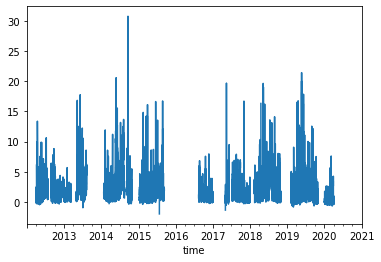

In [27]:
import scipy.io as sio
test = sio.loadmat(fn_liine)

df_lii = pd.DataFrame(test['ACSM_DEFAULT'], columns=columns)#.set_index('time')

df_lii['time'] = fix_matlabtime(df_lii['time']) + datetime.timedelta(hours=1)

df_lii = df_lii.set_index('time')

df_lii['Org'].plot()

In [28]:
df_lii['day_of_year'] = df_lii.index.dayofyear
df_lii['month'] = df_lii.index.month

<AxesSubplot:xlabel='month'>

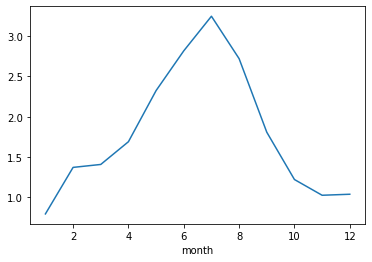

In [29]:
df_lii['Org'][df_lii.index.month.isin(range(0,13))].groupby(df_lii['month']).mean().plot()


In [30]:
df_lii['Org'][df_lii.index.month.isin([6,7,8])].quantile([.32,.64])


0.32    1.591037
0.64    3.025914
Name: Org, dtype: float64

In [31]:
obs_hyy_s = df_lii[df_lii.index.month.isin([7,8])]

In [32]:
obs_hyy_s.loc['2012':'2018']#.quantile([.33,.66])

,Org,SO4,NO3,NH4,Chl,day_of_year,month
time,,,,,,,
2012-07-01 00:00:00,3.503379,0.417650,0.503222,NaN,NaN,183,7
2012-07-01 01:00:00,3.145391,0.375274,0.529968,NaN,NaN,183,7
2012-07-01 02:00:00,3.751276,0.444567,0.515049,NaN,NaN,183,7
2012-07-01 03:00:00,4.110489,0.348362,0.511847,NaN,NaN,183,7
2012-07-01 04:00:00,3.887238,0.385370,0.616664,NaN,NaN,183,7
...,...,...,...,...,...,...,...
2018-08-31 19:00:00,2.366821,0.216743,0.118522,0.165808,0.015068,243,8
2018-08-31 20:00:00,2.514625,0.256356,0.094490,0.293094,0.014430,243,8
2018-08-31 21:00:00,2.328126,0.221023,0.126077,0.265872,-0.007015,243,8


In [33]:
obs_hyy_s['Org'].quantile([.33,.66])

0.33    1.708664
0.66    3.288182
Name: Org, dtype: float64

In [34]:
fn = path_measurement_data / 'SourceData_Yli_Juuti2021.xls'

df_hyy_1 = pd.read_excel(fn, sheet_name=0, header=2, usecols=range(6))

df_hyy_1.head()

df_hyy_1['date'] = df_hyy_1.apply(lambda x: f'{x.year:.0f}-{x.month:02.0f}-{x.day:02.0f}', axis=1)

df_hyy_1['date'] = pd.to_datetime(df_hyy_1['date'] )



In [35]:
import matplotlib.pyplot as plt

(17348.0, 17410.0)

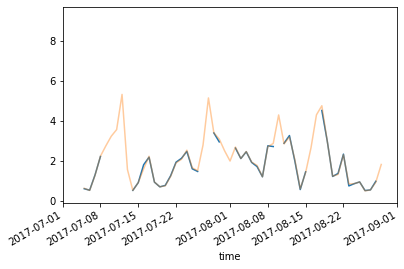

In [36]:
df_hyy_1.set_index('date')['OA (microgram m^-3)'].plot()
obs_hyy_s['Org'].resample('1D').median().plot(alpha=.4)
plt.xlim(['2017-07','2017-09'])

## mask same values because of wind direction

In [37]:
isna = df_hyy_1[df_hyy_1['OA (microgram m^-3)'].isna()]

In [38]:
df_lii_msk_mean = obs_hyy_s.resample('1D').mean()#.loc[df_hyy_1['date']]
#df_lii_msk_mean['Org'].loc[isna['date']] = np.nan

In [39]:
obs_hyy_s['hour'] = obs_hyy_s.index.hour

/tmp/ipykernel_234882/202611806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs_hyy_s['hour'] = obs_hyy_s.index.hour


In [40]:
obs_hyy_s_mh = obs_hyy_s[(obs_hyy_s['hour']>9) & (obs_hyy_s['hour']<19)]

In [41]:
df_lii_msk_mh = obs_hyy_s_mh.resample('1D').median()#.loc[df_hyy_1['date']]
#df_lii_msk_mh['Org'].loc[isna['date']] = np.nan

In [42]:
df_lii_msk_mean = obs_hyy_s.resample('1D').mean()#.loc[df_hyy_1['date']]
#df_lii_msk_mean['Org'].loc[isna['date']] = np.nan

In [43]:
df_lii_msk = obs_hyy_s.resample('1D').median()#.loc[df_hyy_1['date']]
#df_lii_msk['Org'].loc[isna['date']] = np.nan

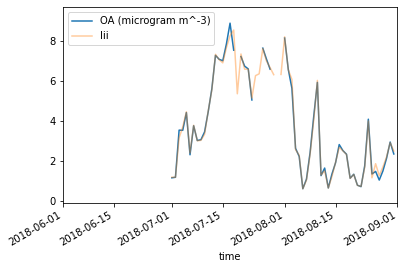

In [44]:
df_hyy_1.set_index('date')['OA (microgram m^-3)'].plot()
df_lii_msk['Org'].plot(alpha=.4, label='lii')
plt.xlim(['2018-06','2018-09'])
plt.legend()

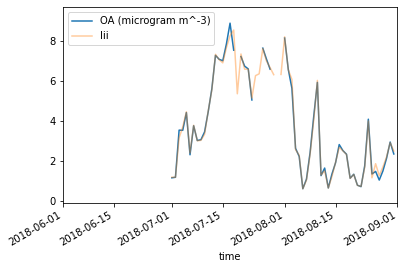

In [45]:
df_hyy_1.set_index('date')['OA (microgram m^-3)'].plot()
df_lii_msk['Org'].plot(alpha=.4, label='lii')
plt.xlim(['2018-06','2018-09'])
plt.legend()

In [46]:
obs_hyy_s['Org'].quantile([0.33, .66])

0.33    1.708664
0.66    3.288182
Name: Org, dtype: float64

In [47]:
df_lii_msk['Org'].quantile([.33,.66])

0.33    1.772676
0.66    3.256889
Name: Org, dtype: float64

In [48]:
df_hyy_1['OA (microgram m^-3)'].quantile([0.33,.66])

0.33    1.764008
0.66    3.296452
Name: OA (microgram m^-3), dtype: float64

### Try to mask by OA:

In [49]:
df_lii_msk['Org']

time
2012-07-01    3.118567
2012-07-02    1.786379
2012-07-03    2.350536
2012-07-04    2.110059
2012-07-05    3.391276
                ...   
2020-08-27         NaN
2020-08-28         NaN
2020-08-29         NaN
2020-08-30         NaN
2020-08-31         NaN
Freq: D, Name: Org, Length: 2984, dtype: float64

In [50]:
fn = path_measurement_data / 'SourceData_Yli_Juuti2021.xls'

df_cld_yli = pd.read_excel(fn, sheet_name=4, header=1,)# usecols=range(7,12),nrows=7)

df_cld_yli.head()



,year,month,day,LAT,LON,OA (microgram m^-3),CWP (g m^-2),CER (micrometer),COT
0,2012,7,5,60.5,22.5,3.218589,191,12.940000,26.219999
1,2012,7,10,60.5,22.5,4.714353,172,10.950000,24.430000
2,2012,7,14,60.5,22.5,1.451827,106,15.790000,12.030000
3,2012,7,19,60.5,22.5,3.101941,262,16.039999,28.650000
4,2012,7,22,60.5,22.5,0.875789,92,10.630000,14.820000


In [51]:
import pandas as pd

In [52]:
df_cld_yli['date'] = df_cld_yli.apply(lambda x: f'{x.year:.0f}-{x.month:02.0f}-{x.day:02.0f}', axis=1)

df_cld_yli['date'] = pd.to_datetime(df_cld_yli['date'] )

In [53]:
df_cld_yli = df_cld_yli.set_index(['date','LAT','LON'])

## TODO: Need to mask saw mill influence

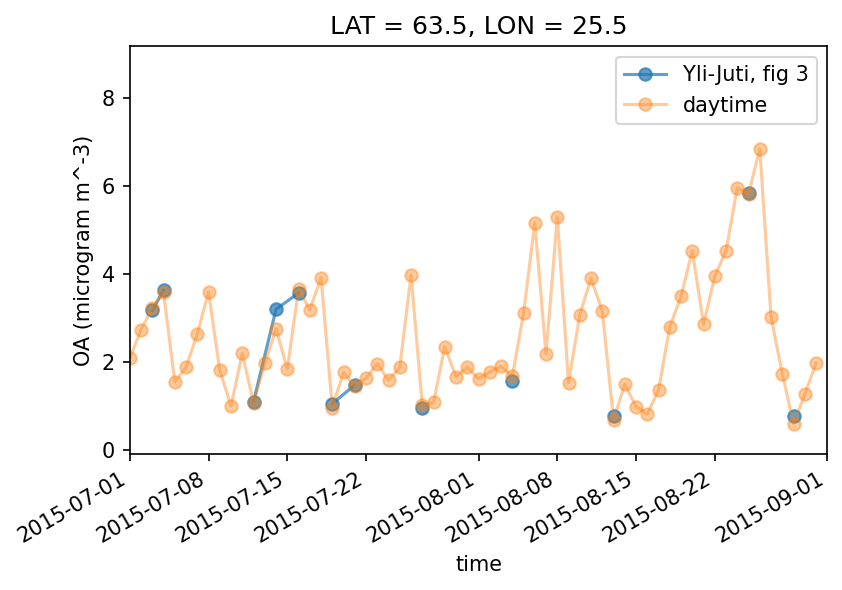

In [54]:
timelist = ['2015-07','2015-08']
daytime_from = 7
daytime_to = daytime_from + 7
#obs_hyy_mh = obs_hyy_s[(obs_hyy_s['hour']>=daytime_from) & (obs_hyy_s['hour']<=daytime_to)]
#df_lii_msk_mh = obs_hyy_mh.resample('1D').median()#.loc[df_hyy_1['date']]


fig = plt.figure(dpi=150)
#df_hyy_1.set_index('date')['OA (microgram m^-3)'].plot(label='Yli-Juuti, fig 1', marker='*', alpha=.1)
df_cld_yli['OA (microgram m^-3)'].to_xarray().sortby('date').isel(LAT=3,LON=3).sel(date=slice(*timelist)).plot(marker='o', alpha=.7, label='Yli-Juti, fig 3')
df_lii_msk_mh['Org'].plot(alpha=.4, label='daytime', marker='o')
#df_lii_msk_mh_last['Org'].plot(alpha=.4, label='daytime', marker='o')

df_lii_msk_mh_last = df_lii_msk_mh.copy()
plt.xlim(['2015-07','2015-09'])
plt.legend()

### Try to mask by OA:

Pretty good agreement, error likely occurs due to lack of masking of data

## Mask by high or low OA: 

<AxesSubplot:xlabel='time'>

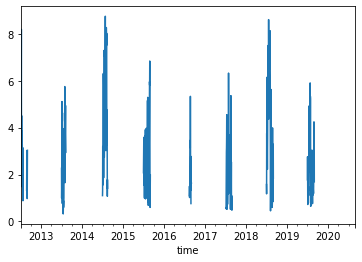

In [56]:
df_lii_msk_mh['Org'].plot()

In [57]:
ds_sat_hyy['OA'] = df_lii_msk_mh['Org']
ds_sat_hyy['high_OA'] = df_lii_msk_mh['Org']>high_perc_OA
ds_sat_hyy['high_OA'][ds_sat_hyy['high_OA'].isnull()] = False
ds_sat_hyy['low_OA'] = df_lii_msk_mh['Org']<low_perc_OA
ds_sat_hyy['low_OA'][ds_sat_hyy['low_OA'].isnull()] = False
ds_sat_hyy['low_OA'] = ds_sat_hyy['low_OA'].astype(bool)
ds_sat_hyy['high_OA'] = ds_sat_hyy['high_OA'].astype(bool)
ds_sat_hyy['drop_mid_OA'] = ~((ds_sat_hyy['low_OA'] | ds_sat_hyy['high_OA']))
ds_sat_hyy_ma = ds_sat_hyy.where((ds_sat_hyy['low_OA'] | ds_sat_hyy['high_OA']))

In [196]:
df_sat_nonan = ds_sat_hyy.to_dataframe().dropna()

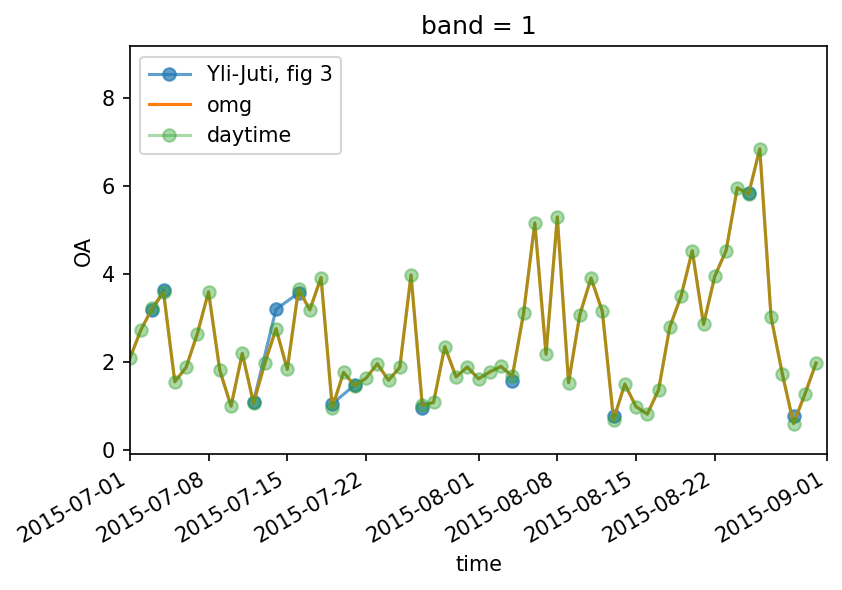

In [60]:
daytime_from = 7
daytime_to = daytime_from + 7
##obs_hyy_mh = obs_hyy[(obs_hyy['hour']>=daytime_from) & (obs_hyy['hour']<=daytime_to)]
#f_lii_msk_mh = obs_hyy_mh.resample('1D').median()#.loc[df_hyy_1['date']]


fig = plt.figure(dpi=150)
#df_hyy_1.set_index('date')['OA (microgram m^-3)'].plot(label='Yli-Juuti, fig 1', marker='*', alpha=.1)
df_cld_yli['OA (microgram m^-3)'].to_xarray().sortby('date').isel(LAT=3,LON=3).sel(date=slice(*timelist)).plot(marker='o', alpha=.7, label='Yli-Juti, fig 3')
ds_sat_hyy['OA'].plot(label='omg')
df_lii_msk_mh['Org'].plot(alpha=.4, label='daytime', marker='o')
#df_lii_msk_mh_last['Org'].plot(alpha=.4, label='daytime', marker='o')

df_lii_msk_mh_last = df_lii_msk_mh.copy()
plt.xlim(['2015-07','2015-09'])
plt.legend()

In [62]:
ds_sat_hyy = ds_sat_hyy.rename({'y':'LAT','x':'LON'}).squeeze()#.to_dataframe().dropna()

## Rename vars

In [64]:
ds_sat_hyy_rn = ds_sat_hyy.rename({'Cloud_Effective_Radius_Liquid_Mean':'CER (micrometer)',
                           'Cloud_Optical_Thickness_Liquid_Mean':'COT',
                           'Cloud_Water_Path_Liquid_Mean':'CWP (g m^-2)',
                          'OA':'OA (microgram m^-3)',
                          })

## Save dataset: 

In [65]:
ds_sat_hyy_rn.to_netcdf(outfilename)

In [63]:
df_sat_rn = ds_sat_hyy_rn.squeeze().to_dataframe().dropna()

KeyboardInterrupt: 

<AxesSubplot:title={'center':'LAT = 63.5, LON = 25.5'}, xlabel='time', ylabel='OA (microgram m^-3)'>

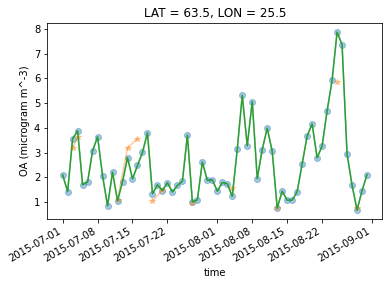

In [206]:
timelist = ['2015-07','2015-08']
ds_sat_hyy_rn['OA (microgram m^-3)'].sel(time=slice(*timelist)).plot(marker='o', alpha=0.4)
df_cld_yli['OA (microgram m^-3)'].to_xarray().sortby('date').isel(LAT=3,LON=3).sel(date=slice(*timelist)).plot(marker='*', alpha=.4)

df_lii_msk_mh['Org'].loc['2015-07':'2015-08'].plot()
df_lii_msk_mh['Org'].loc['2015-07':'2015-08'].plot()

# Extra analysis

In [82]:
ds_sat_rn = df_sat_rn.to_xarray()

In [83]:
ds_sat_rn

<xarray.Dataset>
Dimensions:                                     (LAT: 6, time: 1202, LON: 8)
Coordinates:
  * LAT                                         (LAT) float64 65.5 64.5 ... 60.5
  * time                                        (time) datetime64[ns] 2012-03...
  * LON                                         (LON) float64 22.5 23.5 ... 29.5
Data variables: (12/19)
    CER (micrometer)                            (LAT, time, LON) float32 13.7...
    COT                                         (LAT, time, LON) float32 13.7...
    Cloud_Top_Temperature_Day_Maximum           (LAT, time, LON) float32 280....
    Cloud_Top_Temperature_Day_Mean              (LAT, time, LON) float32 259....
    Cloud_Top_Temperature_Day_Minimum           (LAT, time, LON) float32 230....
    Cloud_Water_Path_Liquid_Maximum             (LAT, time, LON) float32 381....
    ...                                          ...
    is_JJA                                      (LAT, time, LON) object False...
    OA (microgram m^-3)                         (LAT, time, LON) float64 1.25...
    high_OA                                     (LAT, time, LON) object False...
    low_OA                                      (LAT, time, LON) object True ...
    drop_mid_OA                                 (LAT, time, LON) object False...
    number_of_values_in_pixel                   (LAT, time, LON) float64 371....

## Div diagnostics

In [84]:
(df_sat['high_OA'] + df_sat['low_OA']).unique()

array([ True, False])

In [85]:
df_sat['OA_cat'] = np.nan

In [86]:
high_OA_dic = {1:'high OA', 0:'low OA'}

In [87]:
df_sat['OA_cat'] = df_sat['high_OA'].apply(lambda x:high_OA_dic[x])

In [88]:
import seaborn as sns

In [89]:
bins = pd.IntervalIndex.from_tuples([(60, 100), (100, 140), (140, 180), (180, 220), (220, 260), (260, 300), (300, 800)])

In [90]:
labels=[ 80, 120, 160, 200, 240, 280, 320]

In [91]:
df_sat['CWP_cut']=pd.cut(df_sat['Cloud_Water_Path_Liquid_Mean'], bins=bins, labels=labels)


/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 91.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 86.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 80.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 73.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='CWP_cut', ylabel='Cloud_Optical_Thickness_Liquid_Mean'>

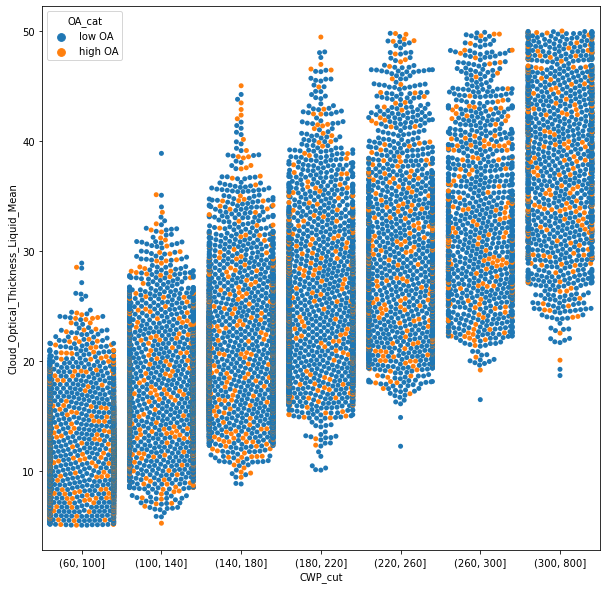

In [92]:
fig, ax = plt.subplots(figsize=[10,10])
sns.swarmplot(data = df_sat, x='CWP_cut', y='Cloud_Optical_Thickness_Liquid_Mean', hue='OA_cat')

<AxesSubplot:xlabel='CWP_cut', ylabel='Cloud_Optical_Thickness_Liquid_Mean'>

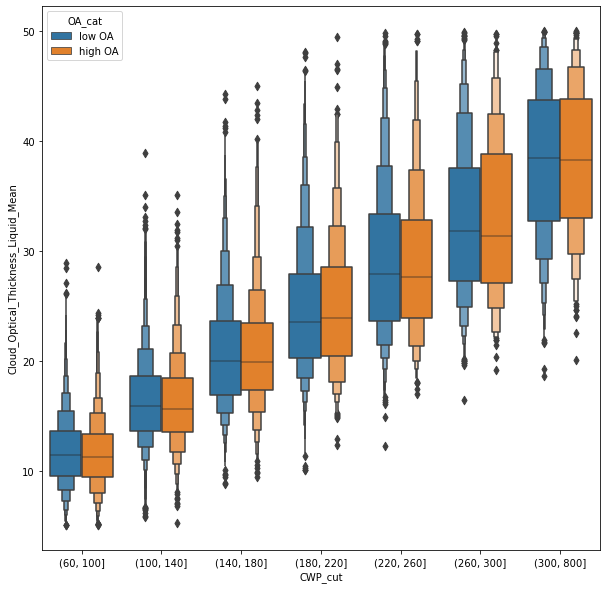

In [93]:
fig, ax = plt.subplots(figsize=[10,10])
sns.boxenplot(data = df_sat, x='CWP_cut', y='Cloud_Optical_Thickness_Liquid_Mean', hue='OA_cat')

In [94]:
df_sat.groupby(['CWP_cut','OA_cat']).count()['Cloud_Effective_Radius_Liquid_Mean']

CWP_cut     OA_cat 
(60, 100]   high OA    1422
            low OA     4896
(100, 140]  high OA     957
            low OA     4014
(140, 180]  high OA     682
            low OA     3064
(180, 220]  high OA     451
            low OA     2435
(220, 260]  high OA     304
            low OA     1480
(260, 300]  high OA     179
            low OA      930
(300, 800]  high OA     239
            low OA     1153
Name: Cloud_Effective_Radius_Liquid_Mean, dtype: int64

In [95]:
len(df_sat)

22206

## Check against paper data:

In [100]:
df_cld_yli

,,,year,month,day,OA (microgram m^-3),CWP (g m^-2),CER (micrometer),COT
date,LAT,LON,,,,,,,
2012-07-05,60.5,22.5,2012,7,5,3.218589,191,12.940000,26.219999
2012-07-10,60.5,22.5,2012,7,10,4.714353,172,10.950000,24.430000
2012-07-14,60.5,22.5,2012,7,14,1.451827,106,15.790000,12.030000
2012-07-19,60.5,22.5,2012,7,19,3.101941,262,16.039999,28.650000
2012-07-22,60.5,22.5,2012,7,22,0.875789,92,10.630000,14.820000
...,...,...,...,...,...,...,...,...,...
2018-08-13,65.5,29.5,2018,8,13,0.674785,191,15.200000,18.969999
2018-08-14,65.5,29.5,2018,8,14,1.356364,291,15.200000,31.449999
2018-08-19,65.5,29.5,2018,8,19,0.916047,139,18.230000,11.960000


In [101]:
len(df_cld_yli)

3673

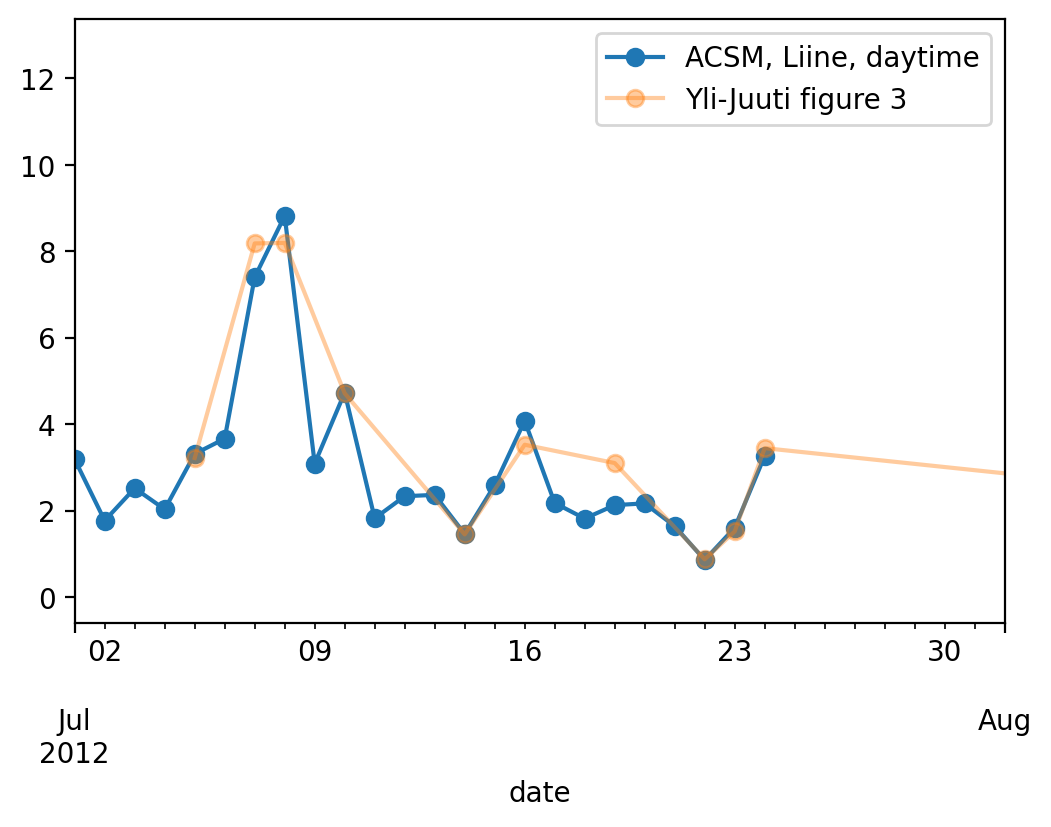

In [155]:
fig, ax = plt.subplots(dpi=200)

df_lii_msk_mh['Org'].plot(marker='o', label='ACSM, Liine, daytime')
df_cld_yli.reset_index().groupby(df_cld_yli.reset_index()['date']).mean()['OA (microgram m^-3)'].plot(alpha=.4, marker='o', label='Yli-Juuti figure 3')
plt.xlim(['2012-07','2012-08'])
plt.legend()

In [ ]:
fig, ax = plt.subplots(dpi=200)
df_lii_msk_mh['Org'].plot(marker='o', label='ACSM, Liine, daytime')
df_cld_yli.reset_index().groupby(df_cld_yli.reset_index()['date']).mean()['OA (microgram m^-3)'].plot(alpha=.4, marker='o', label='Yli-Juuti figure 3')
timelist = ['2015-07','2015-08']
ds_sat_hyy_rn['OA (microgram m^-3)'].sel(time=slice(*timelist)).plot(marker='o', alpha=0.4, label='Saved dataset')

plt.xlim(['2015-07','2015-08'])
plt.legend()

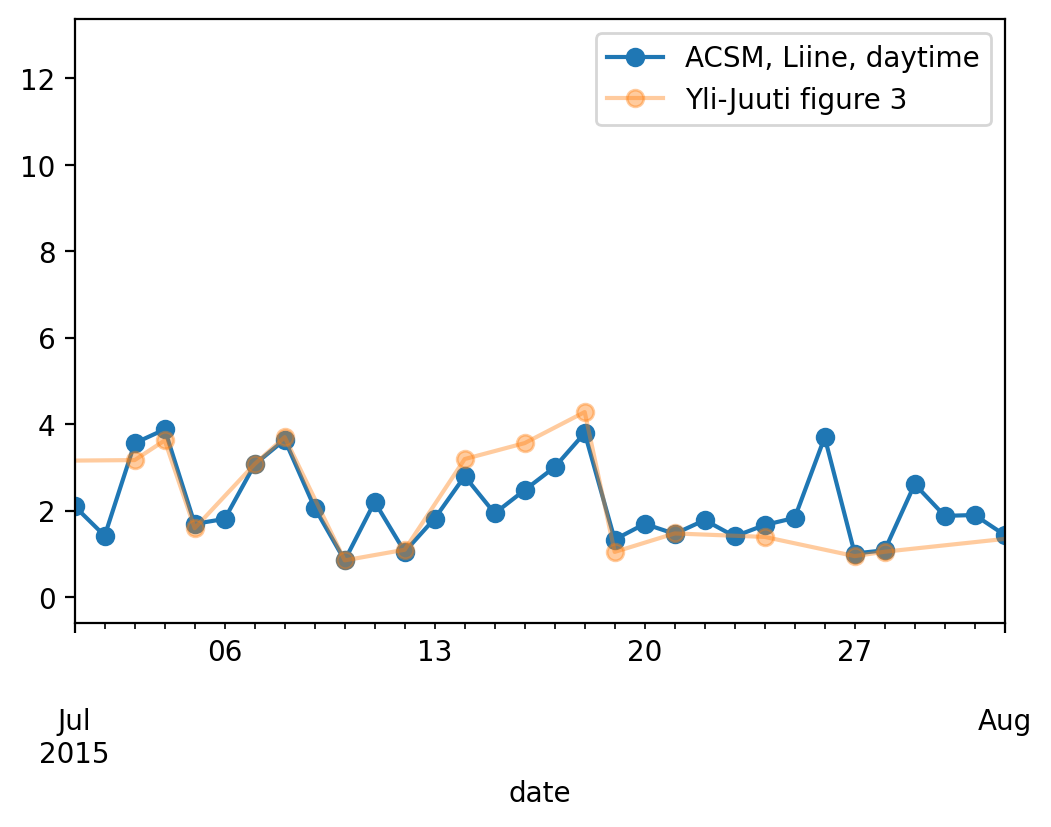

In [156]:
fig, ax = plt.subplots(dpi=200)
df_lii_msk_mh['Org'].plot(marker='o', label='ACSM, Liine, daytime')
df_cld_yli.reset_index().groupby(df_cld_yli.reset_index()['date']).mean()['OA (microgram m^-3)'].plot(alpha=.4, marker='o', label='Yli-Juuti figure 3')
plt.xlim(['2015-07','2015-08'])
plt.legend()

In [103]:
df_sat_rn = df_sat.rename({'Cloud_Effective_Radius_Liquid_Mean':'CER (micrometer)',
                           'Cloud_Optical_Thickness_Liquid_Mean':'COT',
                           'Cloud_Water_Path_Liquid_Mean':'CWP (g m^-2)',
                          'OA':'OA (microgram m^-3)',
                          }, axis=1)

In [104]:
df_sat_rn_sub = df_sat_rn[['OA (microgram m^-3)','CWP (g m^-2)','COT','CER (micrometer)']]

In [105]:
df_sat_rn_sub

OA (microgram m^-3)  CWP (g m^-2)        COT  \
LAT  time       LON                                                  
65.5 2012-03-28 22.5             1.258459         113.0  13.770000   
                29.5             1.258459         386.0  38.419998   
     2012-03-29 22.5             0.687377         107.0  15.059999   
                23.5             0.687377          97.0  11.599999   
                24.5             0.687377         139.0  19.920000   
...                                   ...           ...        ...   
60.5 2018-10-26 25.5             0.289819         239.0  31.250000   
                28.5             0.289819          71.0  12.700000   
     2018-10-28 27.5             0.245989          69.0  11.340000   
                29.5             0.245989          98.0  14.000000   
     2018-10-29 27.5             0.623468         169.0  26.619999   

                      CER (micrometer)  
LAT  time       LON                     
65.5 2012-03-28 22.5         13.740000  
                29.5         17.430000  
     2012-03-29 22.5         11.889999  
                23.5         12.880000  
                24.5         11.849999  
...                                ...  
60.5 2018-10-26 25.5         13.410000  
                28.5         11.719999  
     2018-10-28 27.5         11.450000  
                29.5         11.429999  
     2018-10-29 27.5         15.679999  

[22206 rows x 4 columns]

In [106]:
len(df_sat_rn_sub)

22206

In [107]:
len(df_cld_yli)

3673

<AxesSubplot:ylabel='Frequency'>

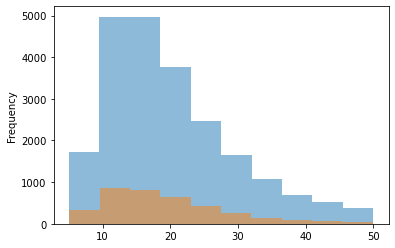

In [108]:
df_sat_rn_sub['COT'].plot.hist(alpha=.5)
df_cld_yli['COT'].plot.hist(alpha=.5)

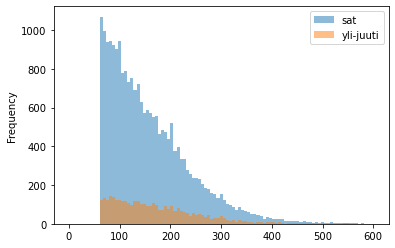

In [109]:
v = 'CWP (g m^-2)'
df_sat_rn_sub.where(df_sat_rn_sub['CWP (g m^-2)']>60)[v].plot.hist(alpha=.5, bins = np.linspace(0,600,100), label = 'sat')
df_cld_yli[v].plot.hist(alpha=.5, bins = np.linspace(0,600,100), label = 'yli-juuti')
plt.legend()

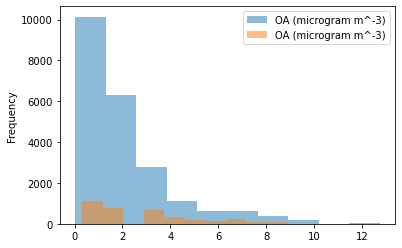

In [110]:
v = 'OA (microgram m^-3)'
df_sat_rn_sub.where(df_sat_rn_sub['CWP (g m^-2)']>60)[v].plot.hist(alpha=.5)#, bins = np.linspace(0,600,100), label = 'sat')
df_cld_yli[v].plot.hist(alpha=.5)#, bins = np.linspace(0,600,100), label = 'yli-juuti')
plt.legend()

In [111]:
len(df_sat_rn_sub[df_sat_rn_sub['CWP (g m^-2)']>60])

22206

In [112]:
len(df_cld_yli)

3673

In [113]:
df_cld_yli[v].min()

0.3276920255108428

<AxesSubplot:ylabel='Frequency'>

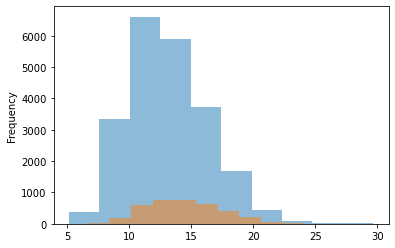

In [114]:
v = 'CER (micrometer)'
df_sat_rn_sub.where(df_sat_rn_sub['CWP (g m^-2)']>60)[v].plot.hist(alpha=.5)
df_cld_yli[v].plot.hist(alpha=.5)

<AxesSubplot:ylabel='Frequency'>

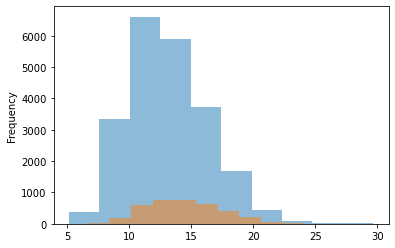

In [115]:
v = 'CER (micrometer)'
df_sat_rn_sub[v].where(df_sat_rn_sub['CWP (g m^-2)']>60).plot.hist(alpha=.5)
df_cld_yli[v].plot.hist(alpha=.5)

#### v = 'OA (microgram m^-3)'
df_sat_rn_sub[v].plot.hist(alpha=.5, bins=np.linspace(0,10,200), label='satellite')
df_cld_yli[v].plot.hist(alpha=.5,bins=np.linspace(0,10,200), label='Yli-Juuti')
plt.legend()

In [116]:
len(df_cld_yli)

3673

In [117]:



q33, q66 = df_sat_rn_sub['OA (microgram m^-3)'].quantile([.33,.66])

In [118]:
q33

1.000325065001472

In [119]:
tf =(df_sat_rn_sub['OA (microgram m^-3)']>2 )& (df_sat_rn_sub['OA (microgram m^-3)']<3.2 )
df_sat_rn_sub.iloc[33:].head(20)

OA (microgram m^-3)  CWP (g m^-2)        COT  \
LAT  time       LON                                                  
65.5 2012-04-04 28.5             2.697028         135.0  19.109999   
                29.5             2.697028         148.0  22.500000   
     2012-04-05 22.5             1.468525         424.0  39.739998   
                25.5             1.468525          94.0  16.600000   
                26.5             1.468525          87.0   9.790000   
                27.5             1.468525         276.0  32.630001   
     2012-04-06 25.5             0.559937         116.0   9.900000   
                26.5             0.559937         163.0   8.840000   
                27.5             0.559937         289.0  30.439999   
                28.5             0.559937         540.0  47.250000   
                29.5             0.559937         261.0  23.910000   
     2012-04-07 28.5             0.587297          83.0  11.809999   
                29.5             0.587297         151.0  14.950000   
     2012-04-08 27.5             3.939769         109.0  11.440000   
                28.5             3.939769         135.0  15.690000   
                29.5             3.939769         146.0  21.689999   
     2012-04-09 26.5             0.989004         100.0  10.510000   
                27.5             0.989004         101.0  10.610000   
                28.5             0.989004         272.0  41.469997   
                29.5             0.989004         103.0   9.790000   

                      CER (micrometer)  
LAT  time       LON                     
65.5 2012-04-04 28.5         15.860000  
                29.5         14.790000  
     2012-04-05 22.5         17.350000  
                25.5         13.969999  
                26.5         19.549999  
                27.5         18.180000  
     2012-04-06 25.5         18.980000  
                26.5         28.340000  
                27.5         18.859999  
                28.5         20.719999  
                29.5         20.350000  
     2012-04-07 28.5         14.200000  
                29.5         16.020000  
     2012-04-08 27.5         19.230000  
                28.5         16.709999  
                29.5         13.450000  
     2012-04-09 26.5         16.570000  
                27.5         20.029999  
                28.5         13.570000  
                29.5         16.639999

In [120]:
df_cld_yli_s = df_cld_yli.reset_index().sort_values(['date','LAT','LON']).set_index(['date','LAT','LON'])
df_sat_rn_sub = df_sat_rn_sub.reset_index().sort_values(['time','LAT','LON']).set_index(['time','LAT','LON'])

In [121]:
df_count_yli_j = df_cld_yli_s.reset_index().groupby([df_cld_yli_s.reset_index()['LAT'],df_cld_yli_s.reset_index()['LON']]).count()#.min()
df_count_yli_j

date  LAT  LON  year  month  day  OA (microgram m^-3)  \
LAT  LON                                                           
60.5 22.5    92   92   92    92     92   92                   92   
     23.5    99   99   99    99     99   99                   99   
     24.5    98   98   98    98     98   98                   98   
     25.5    88   88   88    88     88   88                   88   
     26.5    83   83   83    83     83   83                   83   
     29.5    92   92   92    92     92   92                   92   
61.5 22.5    98   98   98    98     98   98                   98   
     23.5    98   98   98    98     98   98                   98   
     24.5    96   96   96    96     96   96                   96   
     25.5    97   97   97    97     97   97                   97   
     26.5    89   89   89    89     89   89                   89   
     27.5    93   93   93    93     93   93                   93   
     28.5    97   97   97    97     97   97                   97   
     29.5    87   87   87    87     87   87                   87   
62.5 22.5    84   84   84    84     84   84                   84   
     23.5    88   88   88    88     88   88                   88   
     24.5    88   88   88    88     88   88                   88   
     25.5   100  100  100   100    100  100                  100   
     26.5    90   90   90    90     90   90                   90   
     27.5    98   98   98    98     98   98                   98   
     28.5    91   91   91    91     91   91                   91   
     29.5    96   96   96    96     96   96                   96   
63.5 22.5    70   70   70    70     70   70                   70   
     23.5    79   79   79    79     79   79                   79   
     24.5    86   86   86    86     86   86                   86   
     25.5    92   92   92    92     92   92                   92   
     26.5    89   89   89    89     89   89                   89   
     27.5    94   94   94    94     94   94                   94   
     28.5   103  103  103   103    103  103                  103   
     29.5    97   97   97    97     97   97                   97   
64.5 24.5    77   77   77    77     77   77                   77   
     25.5    86   86   86    86     86   86                   86   
     26.5    85   85   85    85     85   85                   85   
     27.5    87   87   87    87     87   87                   87   
     28.5    89   89   89    89     89   89                   89   
     29.5    83   83   83    83     83   83                   83   
65.5 25.5    74   74   74    74     74   74                   74   
     26.5    79   79   79    79     79   79                   79   
     27.5    84   84   84    84     84   84                   84   
     28.5    93   93   93    93     93   93                   93   
     29.5    84   84   84    84     84   84                   84   

           CWP (g m^-2)  CER (micrometer)  COT  
LAT  LON                                        
60.5 22.5            92                92   92  
     23.5            99                99   99  
     24.5            98                98   98  
     25.5            88                88   88  
     26.5            83                83   83  
     29.5            92                92   92  
61.5 22.5            98                98   98  
     23.5            98                98   98  
     24.5            96                96   96  
     25.5            97                97   97  
     26.5            89                89   89  
     27.5            93                93   93  
     28.5            97                97   97  
     29.5            87                87   87  
62.5 22.5            84                84   84  
     23.5            88                88   88  
     24.5            88                88   88  
     25.5           100               100  100  
     26.5            90                90   90  
     27.5            98                98   98  
     28.

In [122]:
_df_cnt_sat = df_sat_rn_sub.reset_index().groupby([df_sat_rn_sub.reset_index()['LAT'],df_sat_rn_sub.reset_index()['LON']]).count()#.min()

In [123]:
len(_df_cnt_sat[_df_cnt_sat['COT']>70])

48

In [124]:
len(df_count_yli_j)

41

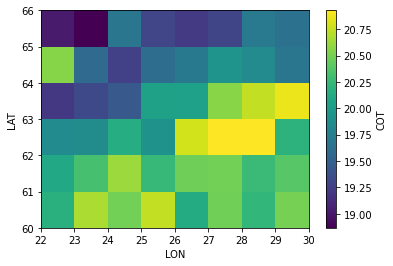

In [125]:
df_sat_rn_sub.to_xarray()['COT'].mean('time').plot()

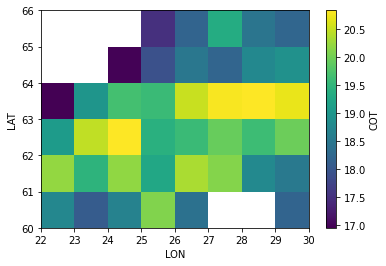

In [126]:
df_cld_yli_s.to_xarray()['COT'].mean('date').plot()

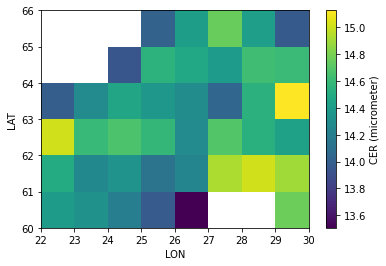

In [127]:
df_cld_yli_s.to_xarray()['CER (micrometer)'].mean('date').plot()

In [128]:
df_cld_yli_s.head(20)

year  month  day  OA (microgram m^-3)  CWP (g m^-2)  \
date       LAT  LON                                                         
2012-07-05 60.5 22.5  2012      7    5             3.218589           191   
                23.5  2012      7    5             3.218589            61   
           61.5 22.5  2012      7    5             3.218589           117   
                23.5  2012      7    5             3.218589            98   
                24.5  2012      7    5             3.218589           121   
                25.5  2012      7    5             3.218589            67   
                28.5  2012      7    5             3.218589            66   
                29.5  2012      7    5             3.218589           100   
           62.5 22.5  2012      7    5             3.218589           116   
                23.5  2012      7    5             3.218589            77   
                28.5  2012      7    5             3.218589            65   
                29.5  2012      7    5             3.218589           134   
           63.5 23.5  2012      7    5             3.218589            62   
                24.5  2012      7    5             3.218589            74   
                25.5  2012      7    5             3.218589            70   
                26.5  2012      7    5             3.218589            87   
           64.5 29.5  2012      7    5             3.218589            80   
           65.5 28.5  2012      7    5             3.218589            74   
2012-07-07 60.5 29.5  2012      7    7             8.181238           134   
           62.5 22.5  2012      7    7             8.181238           149   

                      CER (micrometer)        COT  
date       LAT  LON                                
2012-07-05 60.5 22.5         12.940000  26.219999  
                23.5          9.750000   9.719999  
           61.5 22.5         11.030000  17.150000  
                23.5         11.440000  15.460000  
                24.5         10.110000  20.119999  
                25.5          6.830000  16.750000  
                28.5         11.259999   9.740000  
                29.5          9.950000  16.590000  
           62.5 22.5          9.830000  18.139999  
                23.5         10.000000  13.580000  
                28.5          9.540000  12.429999  
                29.5         11.139999  20.420000  
           63.5 23.5          8.570000  12.020000  
                24.5          9.260000  14.020000  
                25.5         12.570000  10.300000  
                26.5         11.730000  11.660000  
           64.5 29.5         17.379999   7.550000  
           65.5 28.5         17.629999   6.810000  
2012-07-07 60.5 29.5         19.559999  11.620000  
           62.5 22.5         11.719999  19.459999

In [129]:
a = df_cld_yli_s.reset_index()
b = df_sat_rn_sub.reset_index()

In [130]:
a_m = a.groupby(a['date']).mean().reset_index().set_index('date')
b_m = b.groupby(b['time']).mean().reset_index().set_index('time')

In [131]:
a_m

,LAT,LON,year,month,day,OA (microgram m^-3),CWP (g m^-2),CER (micrometer),COT
date,,,,,,,,,
2012-07-05,62.444444,25.666667,2012.0,7.0,5.0,3.218589,92.222222,11.164444,14.371111
2012-07-07,64.000000,26.100000,2012.0,7.0,7.0,8.181238,189.900000,14.004000,20.910999
2012-07-08,62.233333,26.033333,2012.0,7.0,8.0,8.192206,133.666667,13.134666,16.153333
2012-07-10,62.178571,26.392857,2012.0,7.0,10.0,4.714353,209.821429,12.493928,26.915714
2012-07-14,63.107143,25.964286,2012.0,7.0,14.0,1.451827,189.428571,16.753571,18.295357
...,...,...,...,...,...,...,...,...,...
2018-08-24,62.863636,25.136364,2018.0,8.0,24.0,3.848519,115.363636,12.956363,15.642727
2018-08-25,64.400000,27.200000,2018.0,8.0,25.0,0.984315,188.000000,15.309000,19.871999
2018-08-27,63.467742,26.790323,2018.0,8.0,27.0,0.823307,226.677419,16.544838,22.030967


In [132]:
all_vals = a_m[a_m.index.isin(b_m.index)]#.index

In [133]:
merg =pd.merge(a_m, b_m, how='inner', right_index=True, left_index=True)

In [134]:
merg2 = pd.merge(merg, df_hyy_1.set_index('date'), how='inner', right_index=True, left_index=True)

In [135]:
df_lii_msk

,Org,SO4,NO3,NH4,Chl,day_of_year,month,hour
time,,,,,,,,
2012-01-01,NaN,NaN,NaN,NaN,NaN,1.0,1.0,13.0
2012-01-02,NaN,NaN,NaN,NaN,NaN,2.0,1.0,11.5
2012-01-03,NaN,NaN,NaN,NaN,NaN,3.0,1.0,11.5
2012-01-04,NaN,NaN,NaN,NaN,NaN,4.0,1.0,11.5
2012-01-05,NaN,NaN,NaN,NaN,NaN,5.0,1.0,11.5
...,...,...,...,...,...,...,...,...
2018-12-27,NaN,NaN,NaN,NaN,NaN,361.0,12.0,11.5
2018-12-28,NaN,NaN,NaN,NaN,NaN,362.0,12.0,11.5
2018-12-29,NaN,NaN,NaN,NaN,NaN,363.0,12.0,11.5


In [136]:
merg3 = pd.merge(merg2, df_lii_msk, how='inner', right_index=True, left_index=True)

In [137]:
from_h = 10
to_h = from_h + 7
obs_hyy_s_mh = obs_hyy_s[(obs_hyy_s['hour']>=from_h) & (obs_hyy_s['hour']<=to_h)]

df_lii_msk_mh = obs_hyy_s_mh.resample('1D').median().loc[df_hyy_1['date']]
df_lii_msk_mh['Org'].loc[isna['date']] = np.nan



df_lii_msk_mh

fig, ax = plt.subplots(figsize = [5,3],dpi=300)
a_m.loc[merg3.index]['OA (microgram m^-3)'].plot(label='OA from fig 3, Yli-Juuti', marker='o', alpha=0.3, linewidth=0, c='b')
a_m['OA (microgram m^-3)'].plot(label='OA from fig 3, Yli-Juuti', marker='*', alpha=0.3, linewidth=0, c='b')

df_hyy_1.set_index('date').loc[merg3.index]['OA (microgram m^-3)'].plot(alpha=.4, label='OA from fig1, Yli-Juuti', marker='*', linewidth=0)
df_lii_msk.loc[merg3.index]['Org'].plot(alpha=.4, label='OA from Liine, ACSM', marker='*', linewidth=0)
df_lii_msk_mh.loc[merg3.index]['Org'].plot(alpha=.4, label='OA from Liine, daytime, ACSM', marker='o', linewidth=0, c='y')
df_lii_msk_mh['Org'].plot(alpha=.4, label='OA from Liine, daytime, ACSM', marker='o', linewidth=0, c='y')

#df_lii_msk_mean['Org'].plot(alpha=.4, label='OA from Liine, ACSM, mean', marker='d', linewidth=0)
#b_m.loc[merg3.index]['OA (microgram m^-3)'].plot(label='OA from cloud, co-located Sara', marker='o', alpha=0.3, linewidth=0)

plt.xlim(['2018-07','2018-09'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

NameError: name 'obs_hyy_s' is not defined

In [ ]:
from_h = 10
to_h = from_h + 7
obs_hyy_s_mh = obs_hyy_s[(obs_hyy_s['hour']>=from_h) & (obs_hyy_s['hour']<=to_h)]

df_lii_msk_mh = obs_hyy_s_mh.resample('1D').median().loc[df_hyy_1['date']]
df_lii_msk_mh['Org'].loc[isna['date']] = np.nan



df_lii_msk_mh

fig, ax = plt.subplots(figsize = [5,3],dpi=300)
a_m.loc[merg3.index]['OA (microgram m^-3)'].plot(label='OA from fig 3, Yli-Juuti', marker='o', alpha=0.3, linewidth=0, c='b')
a_m['OA (microgram m^-3)'].plot(label='OA from fig 3, Yli-Juuti', marker='*', alpha=0.3, linewidth=0, c='b')
df_lii_msk_mh['Org'].plot(alpha=.4, label='OA from Liine, daytime, ACSM', marker='o', linewidth=0, c='y')

#df_lii_msk_mean['Org'].plot(alpha=.4, label='OA from Liine, ACSM, mean', marker='d', linewidth=0)
#b_m.loc[merg3.index]['OA (microgram m^-3)'].plot(label='OA from cloud, co-located Sara', marker='o', alpha=0.3, linewidth=0)

plt.xlim(['2018-07','2018-09'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
from_h = 10
to_h = from_h + 7
obs_hyy_s_mh = obs_hyy_s[(obs_hyy_s['hour']>=from_h) & (obs_hyy_s['hour']<=to_h)]

df_lii_msk_mh = obs_hyy_s_mh.resample('1D').median().loc[df_hyy_1['date']]
df_lii_msk_mh['Org'].loc[isna['date']] = np.nan



df_lii_msk_mh

fig, ax = plt.subplots(figsize = [5,3],dpi=300)
a_m.loc[merg3.index]['OA (microgram m^-3)'].plot(label='OA from fig 3, Yli-Juuti', marker='o', alpha=0.3, linewidth=0)

df_hyy_1.set_index('date').loc[merg3.index]['OA (microgram m^-3)'].plot(alpha=.4, label='OA from fig1, Yli-Juuti', marker='*', linewidth=0)
df_lii_msk.loc[merg3.index]['Org'].plot(alpha=.4, label='OA from Liine, ACSM', marker='*', linewidth=0)
df_lii_msk_mh.loc[merg3.index]['Org'].plot(alpha=.4, label='OA from Liine, daytime, ACSM', marker='o', linewidth=0)

#df_lii_msk_mean['Org'].plot(alpha=.4, label='OA from Liine, ACSM, mean', marker='d', linewidth=0)
#_m.loc[merg3.index]['OA (microgram m^-3)'].plot(label='OA from cloud, co-located Sara', marker='o', alpha=0.3, linewidth=0)

plt.xlim(['2015-07','2015-09'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
from_h = 10
to_h = from_h + 7
obs_hyy_s_mh = obs_hyy_s[(obs_hyy_s['hour']>=from_h) & (obs_hyy_s['hour']<=to_h)]

df_lii_msk_mh = obs_hyy_s_mh.resample('1D').median().loc[df_hyy_1['date']]
df_lii_msk_mh['Org'].loc[isna['date']] = np.nan



df_lii_msk_mh

fig, ax = plt.subplots(figsize = [5,3],dpi=300)
a_m.loc[merg3.index]['OA (microgram m^-3)'].plot(label='OA from fig 3, Yli-Juuti', marker='o', alpha=0.3, linewidth=0)

df_hyy_1.set_index('date').loc[merg3.index]['OA (microgram m^-3)'].plot(alpha=.4, label='OA from fig1, Yli-Juuti', marker='*', linewidth=0)
df_lii_msk.loc[merg3.index]['Org'].plot(alpha=.4, label='OA from Liine, ACSM', marker='*', linewidth=0)
df_lii_msk_mh.loc[merg3.index]['Org'].plot(alpha=.4, label='OA from Liine, daytime, ACSM', marker='o', linewidth=0)

#df_lii_msk_mean['Org'].plot(alpha=.4, label='OA from Liine, ACSM, mean', marker='d', linewidth=0)
#b_m.loc[merg3.index]['OA (microgram m^-3)'].plot(label='OA from cloud, co-located Sara', marker='o', alpha=0.3, linewidth=0)

plt.xlim(['2017-07','2017-09'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
from_h = 10
to_h = from_h + 7
obs_hyy_s_mh = obs_hyy_s[(obs_hyy_s['hour']>=from_h) & (obs_hyy_s['hour']<=to_h)]

df_lii_msk_mh = obs_hyy_s_mh.resample('1D').median().loc[df_hyy_1['date']]
df_lii_msk_mh['Org'].loc[isna['date']] = np.nan



df_lii_msk_mh

fig, ax = plt.subplots(figsize = [5,3],dpi=300)
a_m.loc[merg3.index]['OA (microgram m^-3)'].plot(label='OA from fig 3, Yli-Juuti', marker='o', alpha=0.3, linewidth=0)

df_hyy_1.set_index('date').loc[merg3.index]['OA (microgram m^-3)'].plot(alpha=.4, label='OA from fig1, Yli-Juuti', marker='*', linewidth=0)
df_lii_msk.loc[merg3.index]['Org'].plot(alpha=.4, label='OA from Liine, ACSM', marker='*', linewidth=0)
df_lii_msk_mh.loc[merg3.index]['Org'].plot(alpha=.4, label='OA from Liine, daytime, ACSM', marker='o', linewidth=0)

#df_lii_msk_mean['Org'].plot(alpha=.4, label='OA from Liine, ACSM, mean', marker='d', linewidth=0)
#b_m.loc[merg3.index]['OA (microgram m^-3)'].plot(label='OA from cloud, co-located Sara', marker='o', alpha=0.3, linewidth=0)

plt.xlim(['2012-07','2012-09'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:

f2 = '/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/satellite/Not_collocated_T_AOD_and_CER_with_wind_and_FRP_all_cases_all_JJA_agg_for_Sara.nc'


In [ ]:
ds_sent = xr.open_dataset(f2)

In [ ]:
ds_sent['Cloud_Optical_Thickness_Liquid_Mean_Uncertainty']

In [ ]:
ds_sent#['Cloud_Effective_Radius'].plot()

In [ ]:
ds_sent_msk = ds_sent.where(ds_sent['Cloud_Effective_Radius']>5)
#ds_sent_msk = ds_sent_msk.where(ds_sent_msk['Cloud_Effective_Radius'ud_Optical_

In [ ]:
df_lii_msk_mh['Org'].loc[from_year:to_year].plot()

In [ ]:
df_lii_msk_mh['Org'].loc['2012':'2018'].quantile([.33,.66])